In [1]:
import pandas as pd
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

<AxesSubplot:>

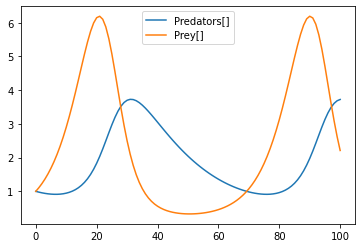

In [2]:
#This is for the simple test model
df = pd.read_csv('results.dat', sep='\t')
df = df[['Predators[]', 'Prey[]']]
df.plot()

ssq err: 0.060350


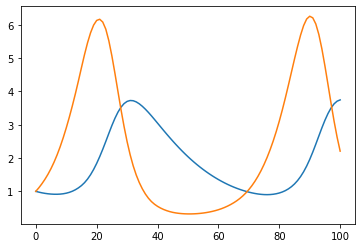

In [9]:
prey_birth = 0.2
nomnom     = 0.1
pred_birth = 0.025
pred_death = 0.05

def ode_fun(t, y) :
    return [
        prey_birth*y[0] - nomnom*y[0]*y[1],
        pred_birth*y[0]*y[1] - pred_death*y[1]
    ]

y0 = [1, 1]
sol = solve_ivp(ode_fun, [0, 100], y0, t_eval=range(101))

plt.plot(sol.t, sol.y[1,:], sol.t, sol.y[0,:])

print('ssq err: %f' % (np.sum(np.square(sol.y[1,:]-df['Predators[]'])) + np.sum(np.square(sol.y[0,:]-df['Prey[]']))))


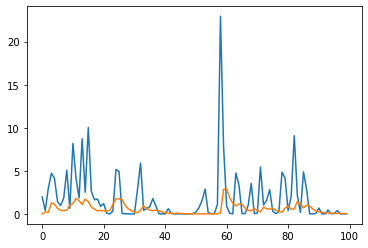

In [12]:
# This is for the other test model
df = pd.read_csv('results.dat', sep='\t')
df_in = pd.read_csv('testinput.dat', sep='\t')
tt = range(100)
plt.plot(tt, df_in['Precipitation'][0:100], tt, df['Soil runoff[0 ]'][1:101])